## Calculate ssha with different retracker methods


In [2]:
import sys
sys.path.append("../utils")
import xarray as xr
import numpy as np
import os
from tiff_io import readTiff
from imgShow import imgShow
import matplotlib.pyplot as plt
from get_filesPath import get_filesPath
from ssha_cal_s3l2 import ssha_cal_s3l2


In [3]:
root_dir = os.path.dirname(os.getcwd())
dir_s3l2 = root_dir+'/test_data/s3a-relative-orbit-260&309'


In [4]:
## data prepare
# 1. get files path
files_path = get_filesPath(base=dir_s3l2, key_words='enhanced_measurement_subs_preproc.nc')
files_path = sorted(files_path)
print('s3l2 files number:', len(files_path))


s3l2 files number: 50


In [4]:
retracker = ['ocean', 'ocog', 'ice_sheet', 'sea_ice']
for path_s3l2 in files_path:
    print(path_s3l2)
    s3_l2 = xr.open_dataset(path_s3l2)
    ## calculate ssha
    for retrack in retracker:
        ssha, ssh = ssha_cal_s3l2(s3l2 = s3_l2, retracker=retrack)
        s3_l2["ssha_estimate_"+retrack] = (['time_20_ku'], ssha)
        s3_l2["ssha_estimate_"+retrack].attrs['name'] = 'estimated ssha with '+retrack+ ' retracker'
        s3_l2["ssha_estimate_"+retrack].attrs['unit'] = 'meter'
    ## writh to new .nc file
    dir_file = os.path.split(path_s3l2)[0]
    name_file = os.path.split(path_s3l2)[1].split('.')[0]
    path_s3l2_new = os.path.join(dir_file, name_file+'_mainproc.nc')
    s3_l2.to_netcdf(path=path_s3l2_new)


saving variable lat_20_c with floating point data as an integer dtype without any _FillValue to use for NaNs
ipykernel_launcher:15: SerializationWarning: saving variable lon_20_c with floating point data as an integer dtype without any _FillValue to use for NaNs
/Users/luo/OneDrive/SWOT/Code-algorithms/radar-altimetry-toolbox/test_data/s3a-relative-orbit-260&309/S3A_SR_2_WAT____20200524T134003_20200524T142755_20200619T060829_2872_058_309______MAR_O_NT_004.SEN3/enhanced_measurement_subs_preproc.nc
ipykernel_launcher:15: SerializationWarning: saving variable lat_01 with floating point data as an integer dtype without any _FillValue to use for NaNs
ipykernel_launcher:15: SerializationWarning: saving variable lon_01 with floating point data as an integer dtype without any _FillValue to use for NaNs
ipykernel_launcher:15: SerializationWarning: saving variable lat_20_ku with floating point data as an integer dtype without any _FillValue to use for NaNs
ipykernel_launcher:15: SerializationWar

(50.0, 350.0, -0.2, 1.3)

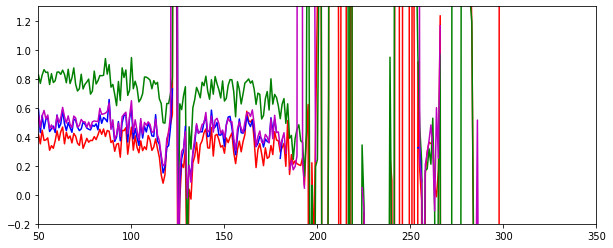

In [5]:
plt.figure(figsize=(10,4))
plt.plot(s3_l2['ssha_estimate_ocean'],'r')
plt.plot(s3_l2['ssha_estimate_ocog'],'g')
plt.plot(s3_l2['ssha_estimate_ice_sheet'],'b')
plt.plot(s3_l2['ssha_estimate_sea_ice'],'m')
plt.axis([50, 350, -0.2, 1.3])
